In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import os
import sys
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.features.externals import laplace

# ORB with Laplace

In [28]:
# Get img
src = cv2.imread('./1203_C1_11R.7.jpg')
img = cv2.cvtColor(src, cv2.COLOR_RGB2BGR)

In [29]:
img.shape

(1198, 1059, 3)

In [30]:
laplace_img = laplace('1203_C1_11R.7.jpg')

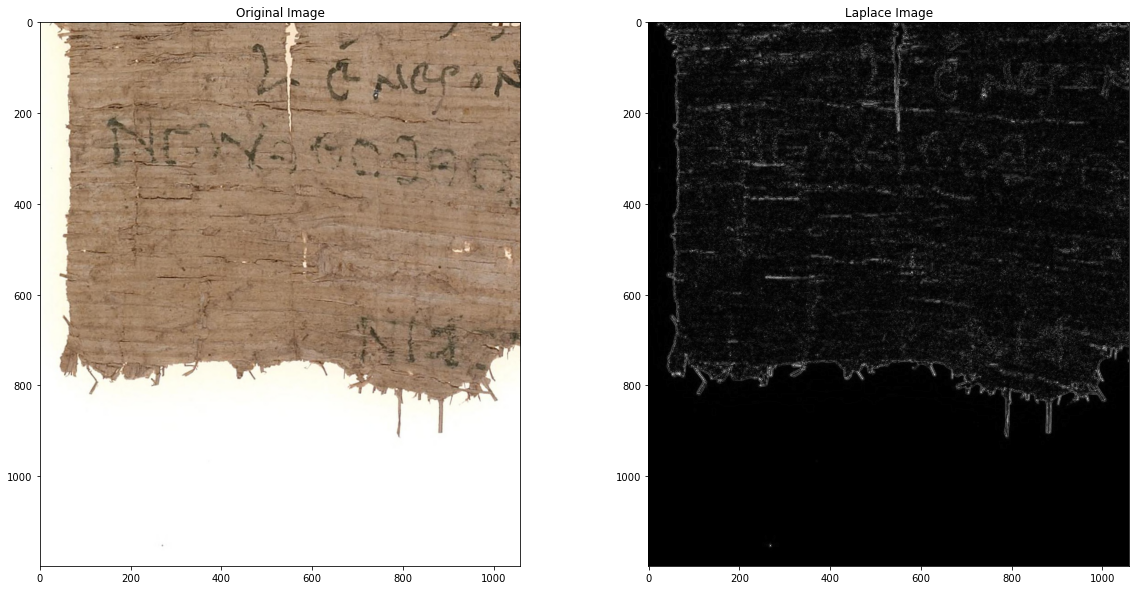

In [31]:
# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Original Image")
plots[0].imshow(img)

plots[1].set_title("Laplace Image")
plots[1].imshow(laplace_img, cmap='gray')
plt.show()

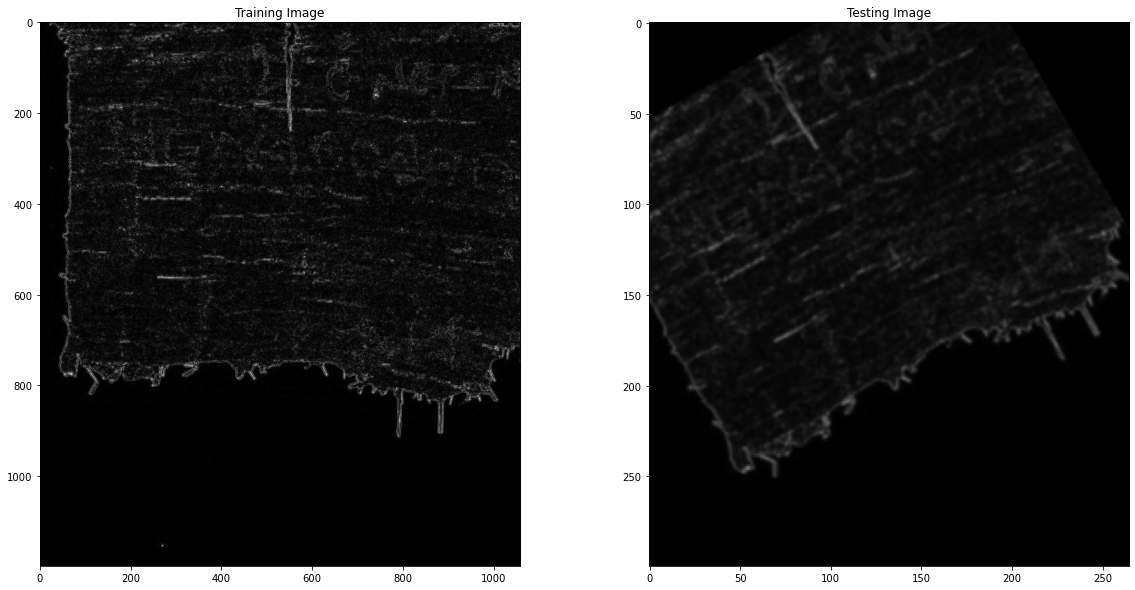

In [32]:
# Get img
#image1 = cv2.imread('./1203_C1_11R_edges_x.7.jpg')

# Convert the training image to RGB
training_image = cv2.cvtColor(laplace_img, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Create test image by adding Scale Invariance and Rotational Invariance
test_image = cv2.pyrDown(training_image)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

Number of Keypoints Detected In The Training Image:  500
Number of Keypoints Detected In The Query Image:  317


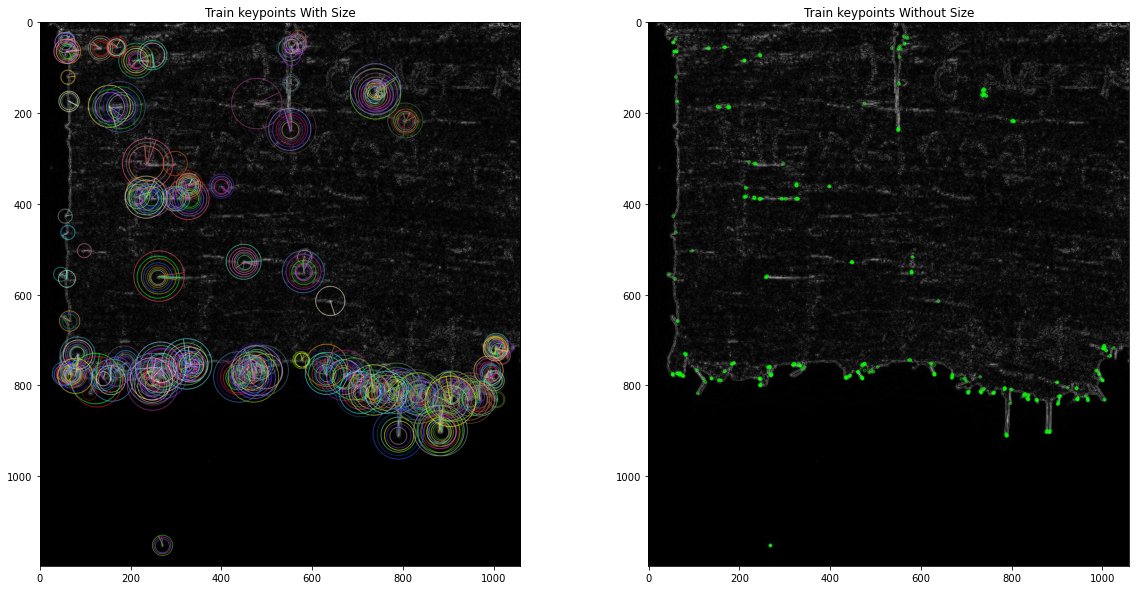

In [33]:
orb = cv2.ORB_create()

train_keypoints, train_descriptor = orb.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = orb.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))